plot the percentage change of each land cover, but split the large and small percentage ones for better visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
import os
import matplotlib.ticker as ticker


def format_year(x, pos=None):
    return str(int(x))[-2:]

def plot_pct_change_split(list_year_plot,
                          df_observe,
                          title=None,
                          ax_1_interval=5.0,
                          ax_2_interval=1.0,
                          legend_flag=True,
                          ):
    """
        plot the area and percentage change of each land cover, but split the large and small percentage ones for better visualization
        The left y-axis is the area, the right y-axis is the percentage
    """

    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(22, 15))
    legend_size = 20
    tick_label_size = 30
    axis_label_size = 36
    title_size = 40
    tick_length = 4

    linewidth = 3.0
    linestyle = 'solid'

    for axis in ['top', 'bottom', 'left', 'right']:
        axes[0].spines[axis].set_linewidth(2)
        axes[1].spines[axis].set_linewidth(2)

    axes[0].set_title(title, fontsize=title_size)

    colors = np.array([np.array([241, 1, 0, 255]) / 255,  # developed
                       np.array([29, 101, 51, 255]) / 255,  # primary wet forest
                       np.array([208, 209, 129, 255]) / 255,  # primary dry forest
                       np.array([108, 169, 102, 255]) / 255,  # secondary forest
                       np.array([174, 114, 41, 255]) / 255,  # shrub/grass
                       np.array([72, 109, 162, 255]) / 255,  # water
                       np.array([186, 85, 211, 255]) / 255,  # wetland
                       np.array([179, 175, 164, 255]) / 255,  # other
                       ])

    axes[0].plot(list_year_plot, (df_observe['8 Other'].values) * 900 / 1000000, label='Other', color=colors[7],
                 marker='D', markersize=13,
                 linestyle=linestyle, linewidth=linewidth)
    axes[0].plot(list_year_plot, df_observe['4 Secondary forest'].values * 900 / 1000000, label='Secondary forest',
                 marker='s', markersize=13,
                 color=colors[3], linestyle=linestyle, linewidth=linewidth)

    axes[1].plot(list_year_plot, df_observe['1 Developed'].values * 900 / 1000000, label='Developed', color=colors[0],
                 marker='>', markersize=13,
                 linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(list_year_plot, df_observe['2 Primary wet forest'].values * 900 / 1000000, label='Primary wet forest', color=colors[1],
                 marker='o', markersize=14,
                 linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(list_year_plot, df_observe['3 Primary dry forest'].values * 900 / 1000000, label='Primary dry forest', color=colors[2],
                 marker='^', markersize=14,
                 linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(list_year_plot, df_observe['5 Shrub/Grass'].values * 900 / 1000000, label='Shrub/Grass', color=colors[4],
                 marker='v', markersize=14,
                 linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(list_year_plot, df_observe['6 Water'].values * 900 / 1000000, label='Water', color=colors[5],
                  marker='<', markersize=14,
                 linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(list_year_plot, df_observe['7 Wetland'].values * 900 / 1000000, label='Wetland', color=colors[6],
                 marker='h', markersize=14,
                 linestyle=linestyle, linewidth=linewidth)

    # adjust the axis format
    for i_ax in range(0, 2):
        ax_tmp = axes[i_ax]

        ax_tmp.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
        ax_tmp.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major')

        ax2 = ax_tmp.secondary_yaxis('right')  # set the second y-axis, copy from the left y-axis
        ax2.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
        ax2.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, right=True, which='major')

        if i_ax == 0:
            ax_tmp.yaxis.set_major_locator(plticker.MultipleLocator(base=ax_1_interval))
            ax2.yaxis.set_major_locator(plticker.MultipleLocator(base=ax_1_interval))
        else:
            ax_tmp.yaxis.set_major_locator(plticker.MultipleLocator(base=ax_2_interval))
            ax2.yaxis.set_major_locator(plticker.MultipleLocator(base=ax_2_interval))

        if i_ax == 1:
            ax_tmp.set_xlabel('year', size=axis_label_size)

        ax_ticks = ax_tmp.get_yticks()  # get the ticks of the left y-axis
        ax_lables = ax_ticks / (df_observe['TOTAL'].values[-1] * 900 / 1000000) * 100  # convert the area to percentage
        ax_lables = np.round(ax_lables, 1)
        ax2.set_yticklabels(ax_lables)  # set the right y-axis with the percentage label

        ax_tmp.set_ylabel('Area (km$^2$)', size=axis_label_size)
        ax2.set_ylabel('Percentage (%)', size=axis_label_size, labelpad=15)

        # Create a FuncFormatter object using the format_year function, change the four-digit year to two-digit year
        year_formatter = ticker.FuncFormatter(format_year)
        ax_tmp.xaxis.set_major_formatter(year_formatter)

        ax_tmp.xaxis.set_major_locator(plticker.MultipleLocator(base=2.0))

    if legend_flag:
        lines_1, labels_1 = axes[0].get_legend_handles_labels()
        lines_2, labels_2 = axes[1].get_legend_handles_labels()

        legend_lines = [lines_2[0], lines_2[1], lines_2[2], lines_1[1], lines_2[3], lines_2[4], lines_2[5], lines_1[0]]
        legend_label = [labels_2[0], labels_2[1], labels_2[2], labels_1[1], labels_2[3], labels_2[4], labels_2[5], labels_1[0]]

        axes[0].legend(legend_lines, legend_label, loc='best', fontsize=legend_size, bbox_to_anchor=(1.1, 1))

    plt.tight_layout()
    plt.show()


C:\Users\64937\AppData\Local\Temp\ipykernel_93556\3971916317.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax_lables)  # set the right y-axis with the percentage label


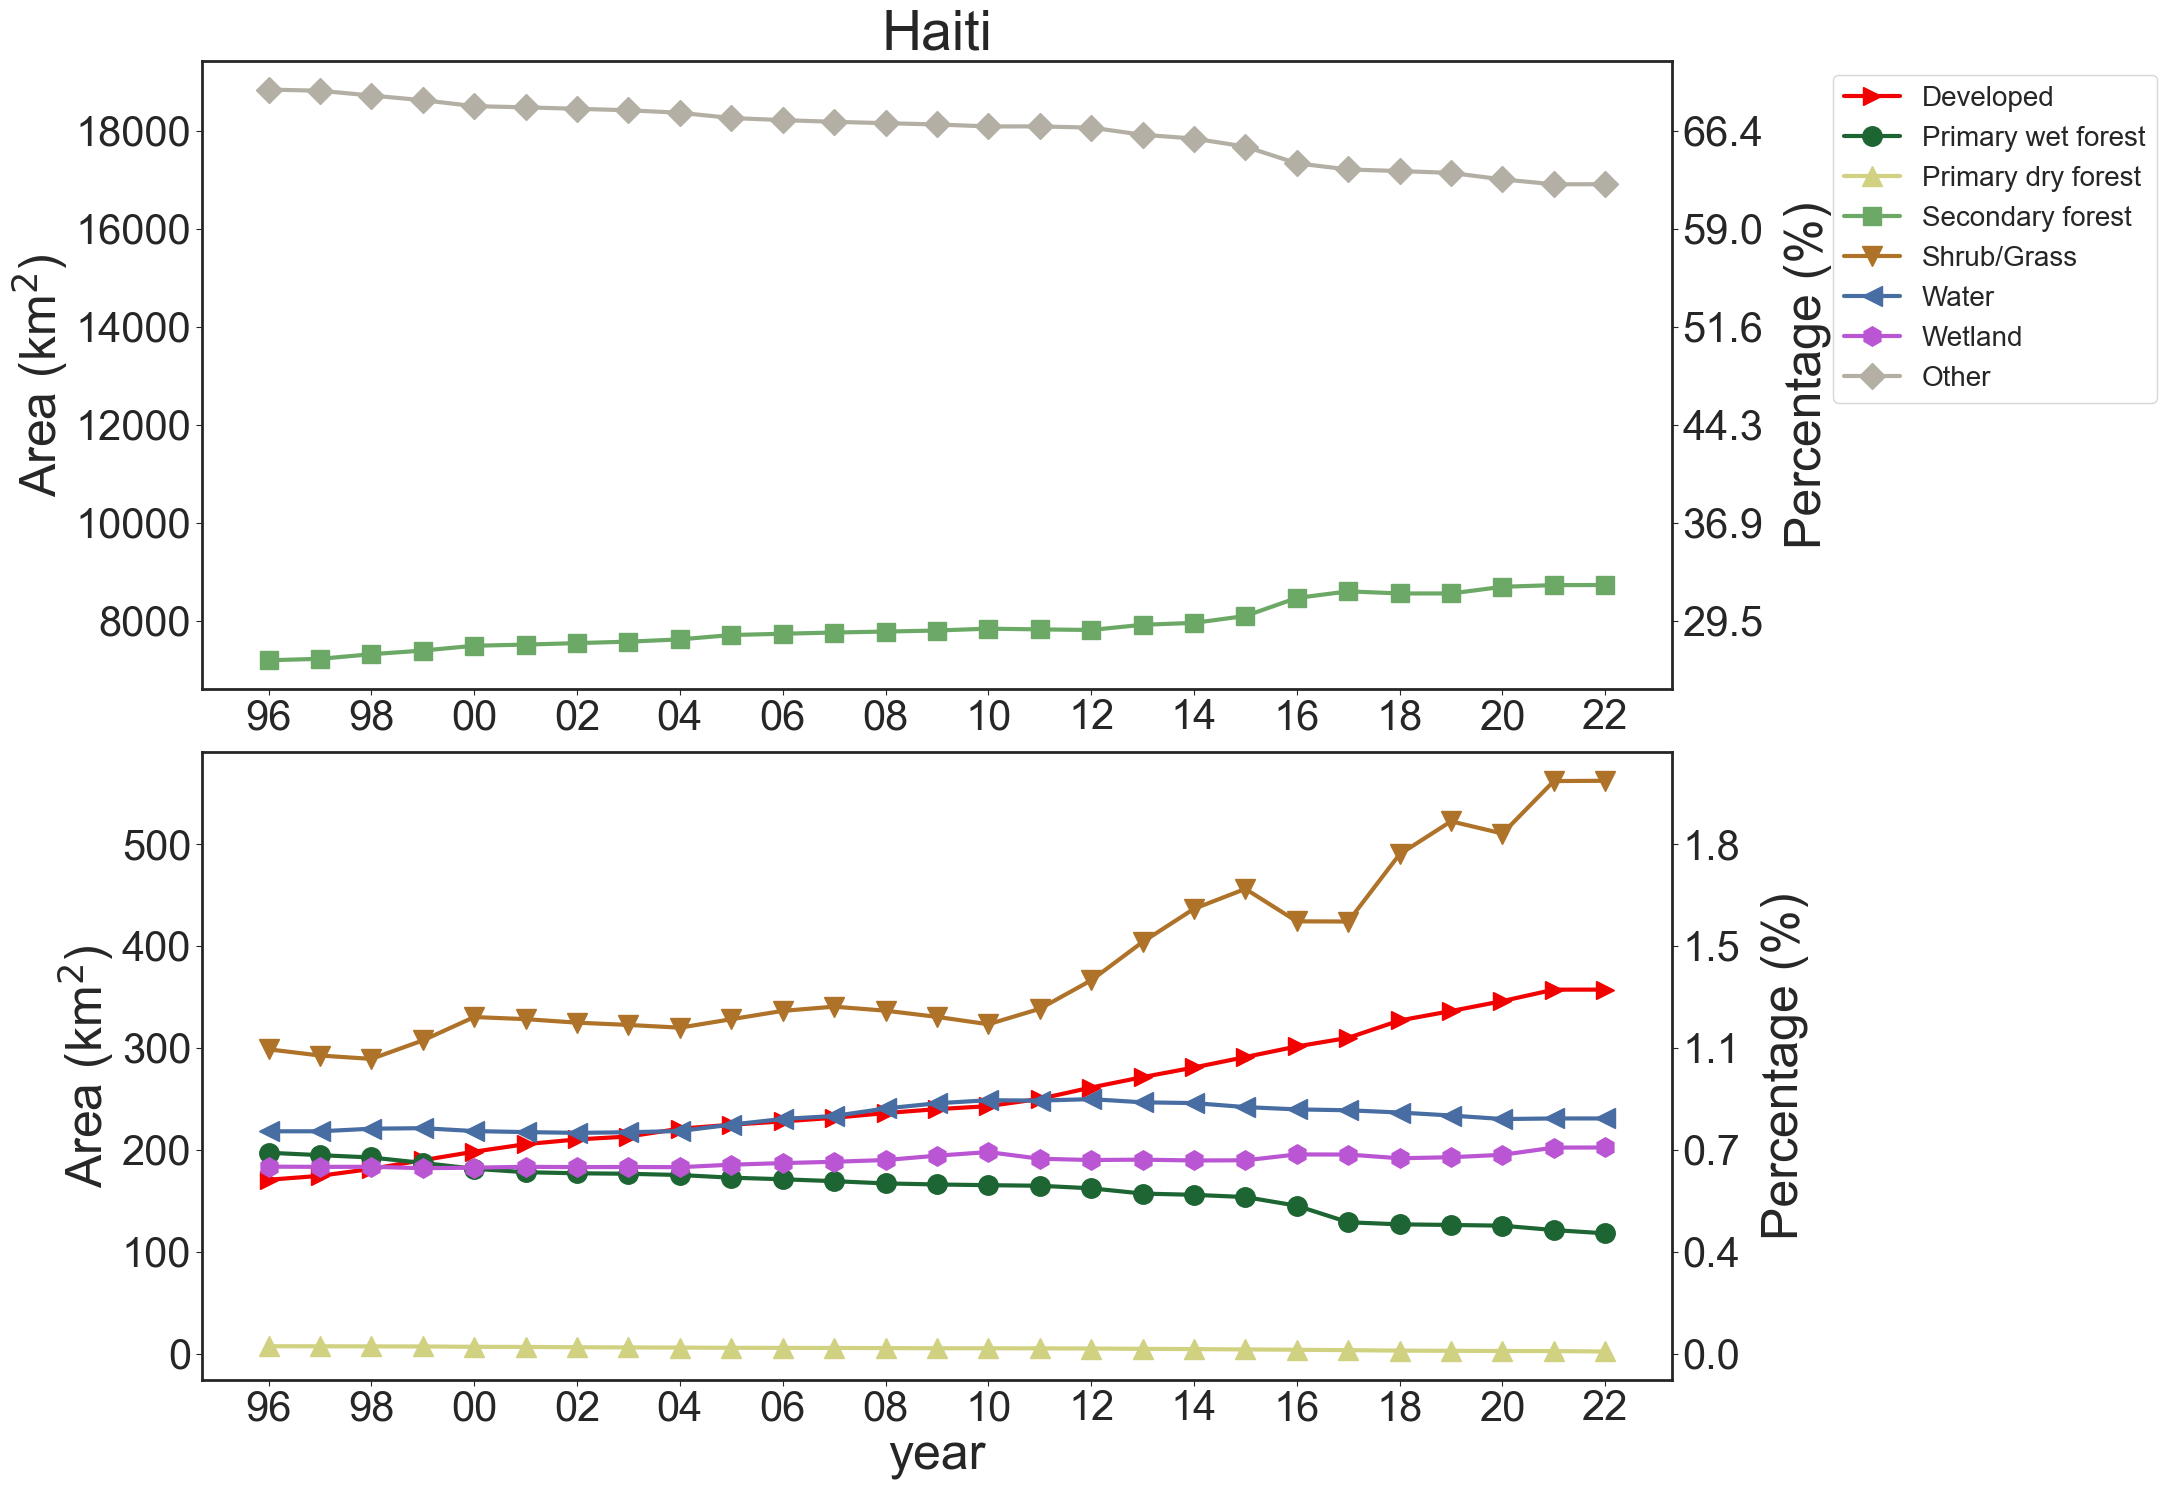

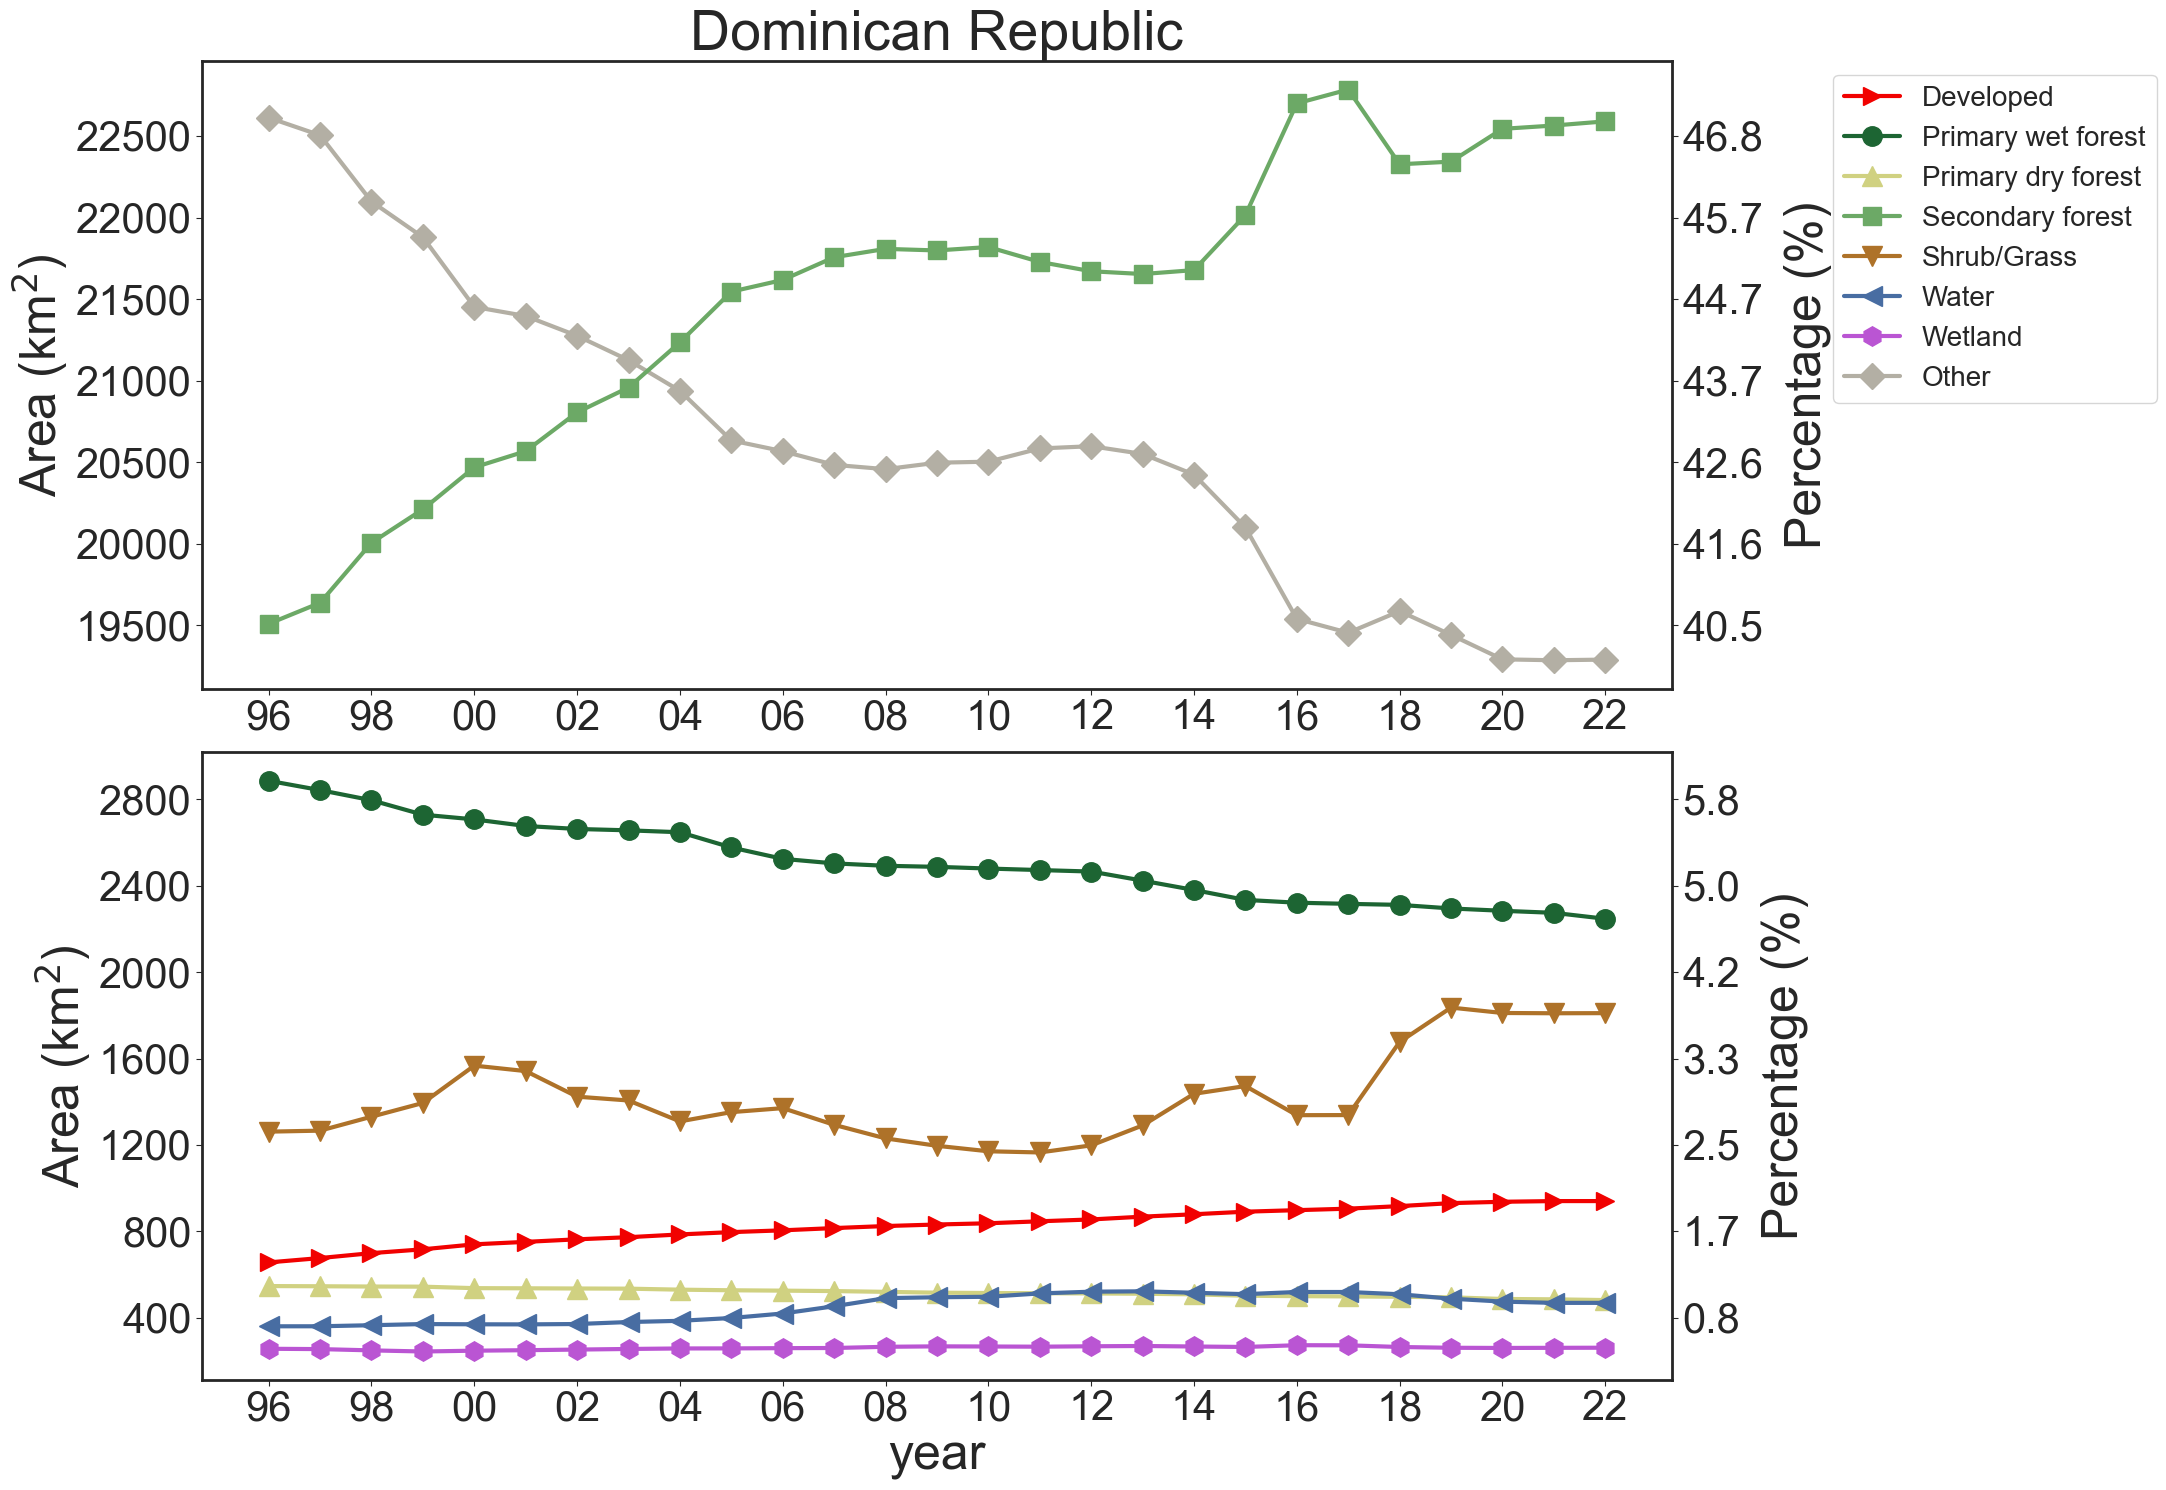

In [2]:
pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

filename_percentile = join(rootpath, 'results', 'land_cover_pct.xlsx')

sheet_hispaniola = pd.read_excel(filename_percentile, sheet_name='Hispaniola')
sheet_haiti = pd.read_excel(filename_percentile, sheet_name='Haiti')
sheet_dr = pd.read_excel(filename_percentile, sheet_name='Dominican')

list_year_plot = np.arange(1996, 2023)
sheet_hispaniola= sheet_hispaniola[sheet_hispaniola['Year'].isin(list_year_plot)]
sheet_haiti = sheet_haiti[sheet_haiti['Year'].isin(list_year_plot)]
sheet_dr = sheet_dr[sheet_dr['Year'].isin(list_year_plot)]

sns.set_style("white")

plot_pct_change_split(list_year_plot,
                      sheet_haiti,
                      title='Haiti',
                      ax_1_interval=2000,
                      ax_2_interval=100,
                      )

plot_pct_change_split(list_year_plot,
                      sheet_dr,
                      title='Dominican Republic',
                      ax_1_interval=500,
                      ax_2_interval=400,
                      )